In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap 
#Libraries for ML
from sklearn.preprocessing import StandardScaler #Standardizasyon için
from sklearn.model_selection import train_test_split, GridSearchCV #GridSearchCV: KNN ile ilgili en iyi parametreleri belirlemek
from sklearn.metrics import accuracy_score ,confusion_matrix #Sonuç değerlendirme
from sklearn.neighbors import KNeighborsClassifier,LocalOutlierFactor #Trainin algoritması ve NCA ve Outlier değerler için
from sklearn.decomposition import PCA #PCA için
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import itertools
plt.style.use('fivethirtyeight')
import seaborn as sns
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print('Shape of dataset is' + str(data.shape))

Shape of dataset is(768, 9)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#Checking for null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
from scipy.stats import skew
for col in data.drop('Outcome', axis = 1).columns:
    print("Skewness for the column {} is {}".format(col, data[col].skew()))

Skewness for the column Pregnancies is 0.9016739791518588
Skewness for the column Glucose is 0.5309885349396285
Skewness for the column BloodPressure is 0.13415273171959252
Skewness for the column SkinThickness is 0.690619013984192
Skewness for the column Insulin is 2.166463843812443
Skewness for the column BMI is 0.5939697505712673
Skewness for the column DiabetesPedigreeFunction is 1.919911066307204
Skewness for the column Age is 1.1295967011444805


In [10]:
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].median()) # Filling null values with the median.

for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']:
    data[col] = data[col].fillna(data[col].mean())

In [11]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

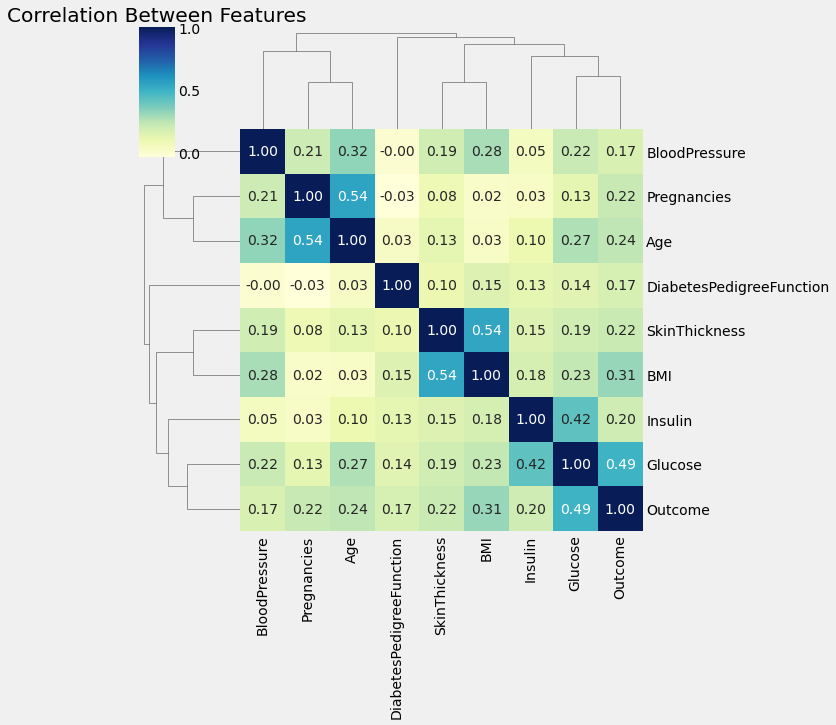

In [12]:
corr_data = data.corr() 
sns.clustermap(corr_data,annot= True,cmap = "YlGnBu",fmt = '.2f')
plt.title('Correlation Between Features')
plt.show();

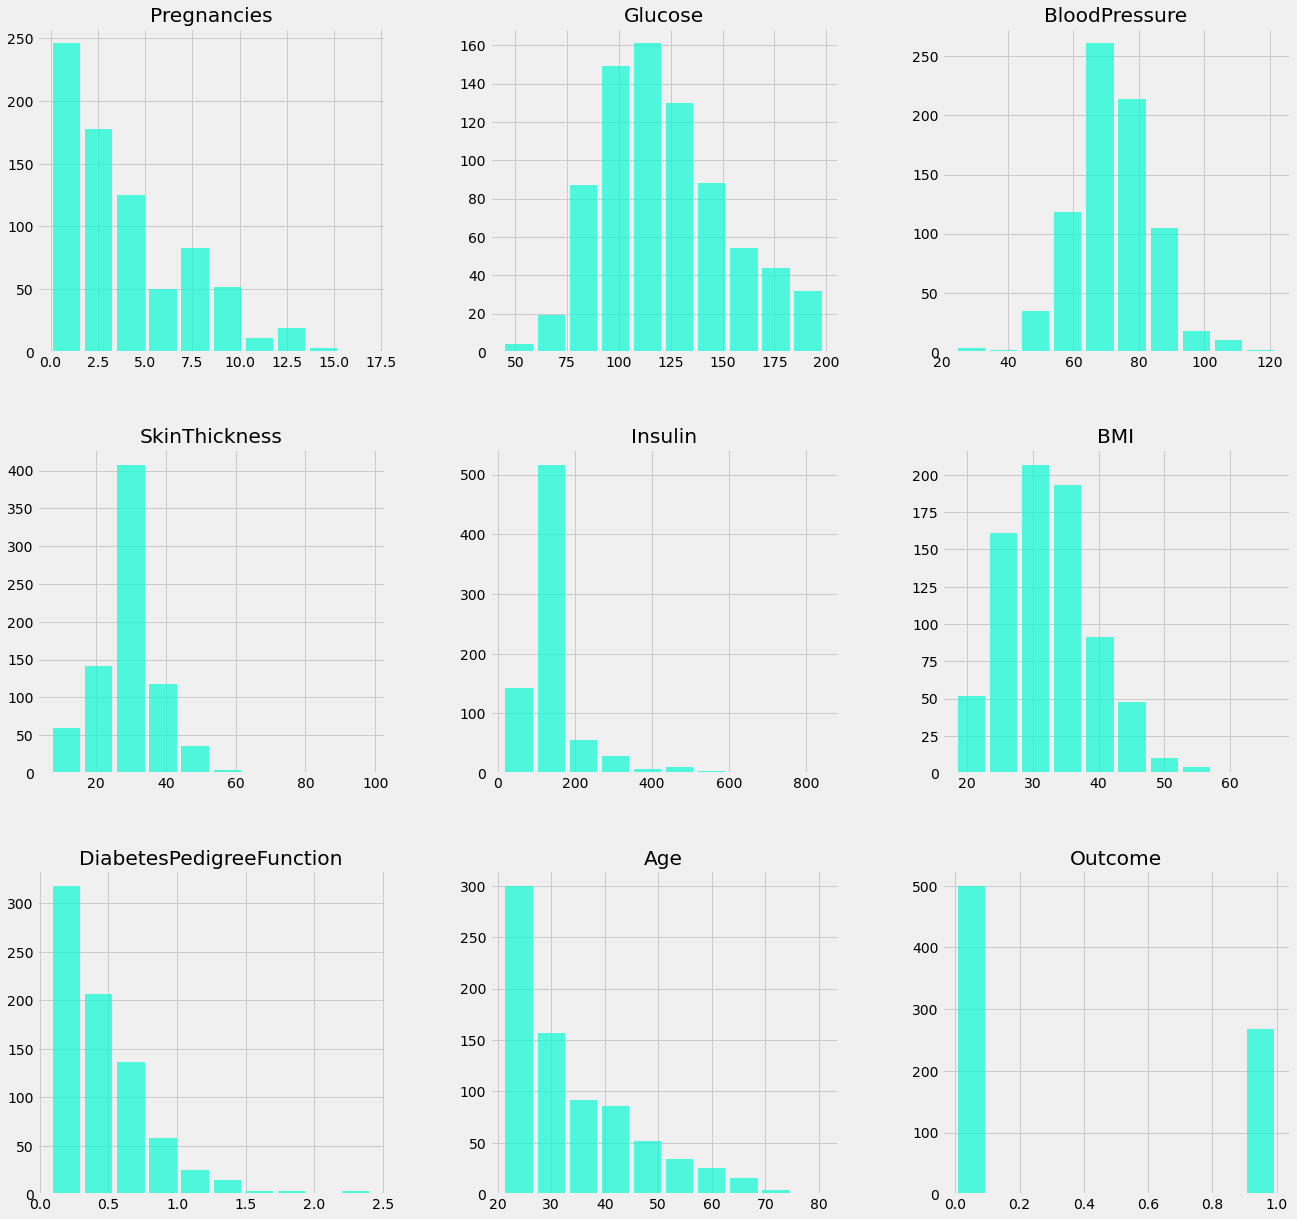

In [13]:
fig=data.hist(figsize = (20,20), color='#09FBD3',alpha=0.7, rwidth=0.85)

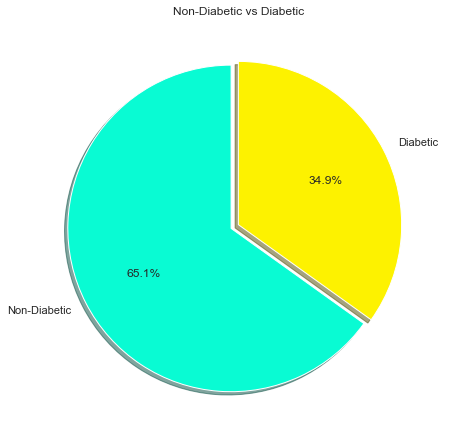

In [14]:
sns.set(style="whitegrid")
labels = ['Non-Diabetic', 'Diabetic']
sizes = data['Outcome'].value_counts(sort = True)

colors = ["#09FBD3","#FDF200"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Non-Diabetic vs Diabetic')
plt.show()

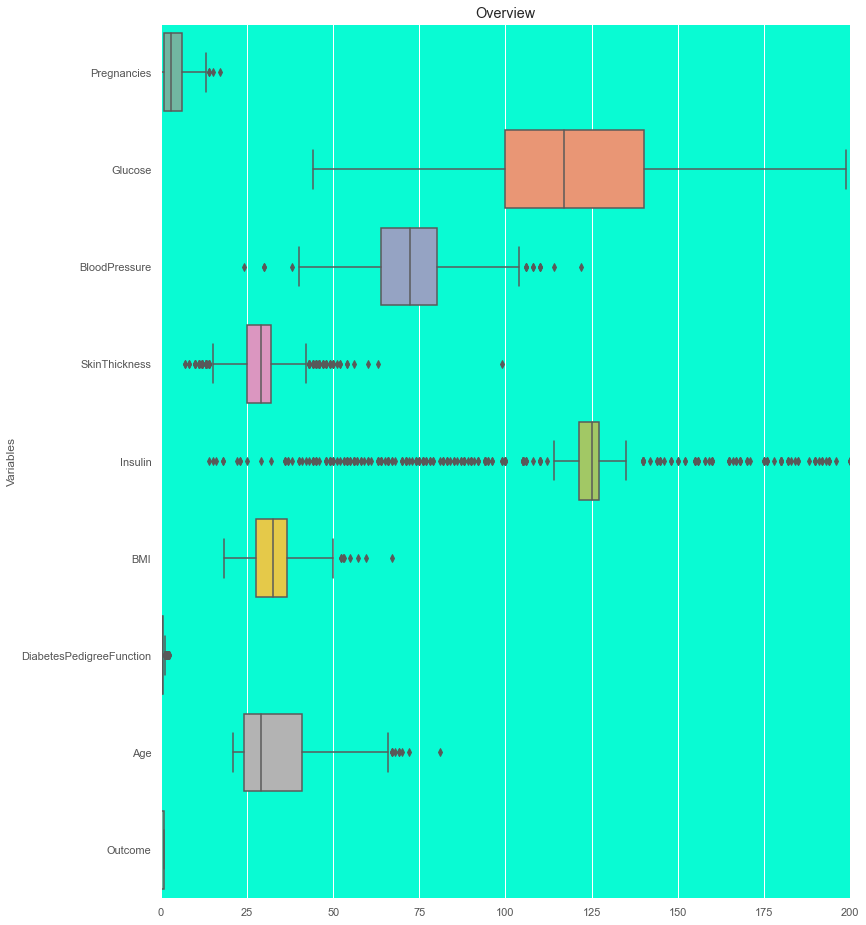

In [15]:
plt.style.use('ggplot') # TO GET AN IDEA OF OUTLIERS 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#09FBD3')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview")
ax = sns.boxplot(data = data, 
  orient = 'h', 
  palette = 'Set2',)

In [16]:
def distplot(col_name):
    
    plt.figure()
    sns.set(style="whitegrid")
    ax = sns.distplot(data[col_name][data.Outcome == 1], color ="gold", rug = True)
    sns.distplot(data[col_name][data.Outcome == 0], color ="#09FBD3",rug = True)
    plt.legend(['Diabetic', 'Healthy'])

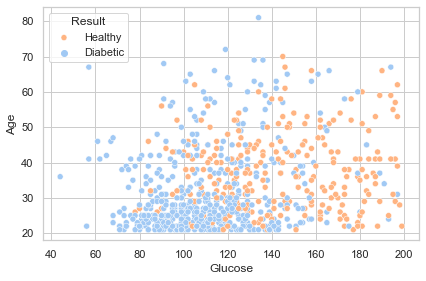

In [17]:
#glucose vs age
sns.set(style='whitegrid')  
g = sns.scatterplot(x='Glucose', y='Age', data=data, hue='Outcome', palette='pastel', legend=True)
plt.legend(title='Result', loc='upper left', labels=['Healthy' , 'Diabetic'])
plt.show(g)

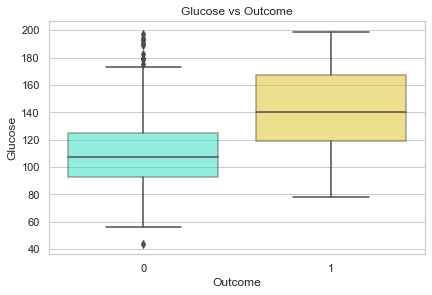

In [18]:
pallete = {0: "#09FBD3", 1: "gold"}
sns.boxplot(x = 'Outcome', y = 'Glucose', boxprops=dict(alpha=.5), data = data, palette = pallete)
plt.title('Glucose vs Outcome')
plt.show()

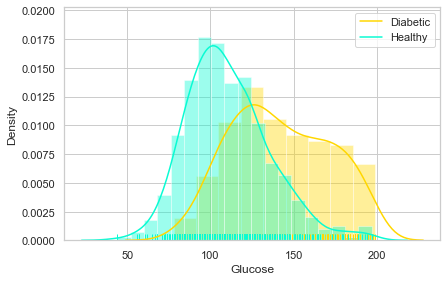

In [19]:
distplot('Glucose')

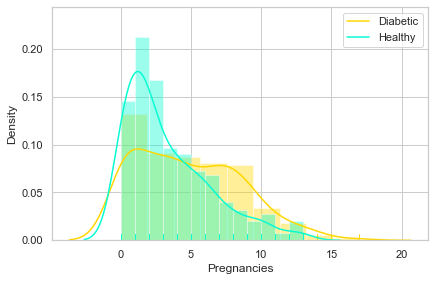

In [20]:
distplot('Pregnancies')

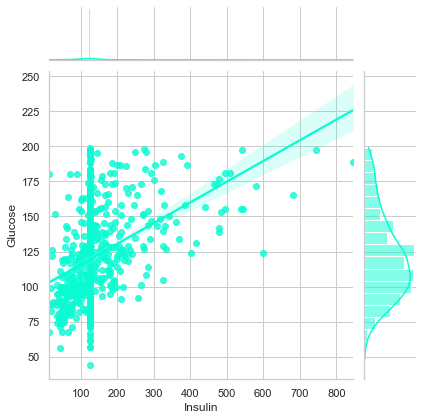

In [21]:
sns.jointplot(x='Insulin',y='Glucose', data=data, kind = 'reg', color = '#09FBD3')
plt.show()

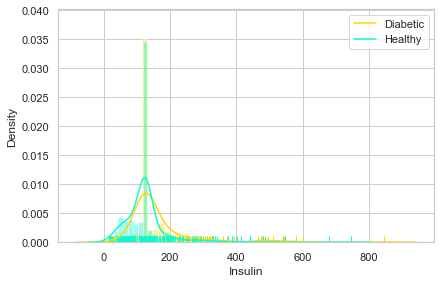

In [22]:
distplot('Insulin')

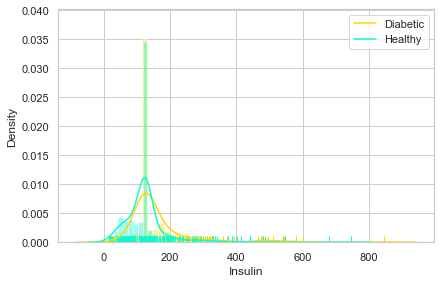

In [23]:
distplot('Insulin')

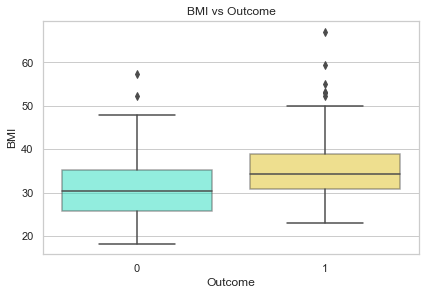

In [24]:
#BMI VS OUTCOME
pallete = {0: "#09FBD3", 1: "gold"}
sns.boxplot(x = 'Outcome', y = 'BMI', boxprops=dict(alpha=.5), data = data, palette = pallete)

plt.title('BMI vs Outcome')
plt.show()

In [25]:
df = data
zero  = df[df['Outcome']==0]   #zero values in outcome column
one = df[df['Outcome']==1]  # one values in outcome column
from sklearn.utils import resample
#minority class that 1, we need to upsample/increase that class so that there is no bias
#n_samples = 500 means we want 500 sample of class 1, since there are 500 samples of class 0
df_minority_upsampled = resample(one, replace = True, n_samples = 500) 
#concatenate
df = pd.concat([zero, df_minority_upsampled])

from sklearn.utils import shuffle
df = shuffle(df) # shuffling so that there is particular sequence

In [26]:
from sklearn.model_selection import train_test_split
#Splitting train and test data
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42, stratify = y)


#Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features= X.columns
X[features] = sc.fit_transform(X[features])

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC



from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
lr = LogisticRegression(random_state=42)

knn = KNeighborsClassifier()

dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

XGB = XGBClassifier()
svc = SVC()

classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn),
               ('Decision Tree', dt), ('Random Forest', rf),('XGBoost',XGB),('SVM',svc)]

for classifier_name, classifier in classifiers:
 
    # Fit clf to the training set
    classifier.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    

   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.2f}'.format(classifier_name, accuracy))

Logistic Regression : 0.74
K Nearest Neighbours : 0.71
Decision Tree : 0.85
Random Forest : 0.86
[13:48:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost : 0.83
SVM : 0.69
